EE 445: Homework Problem Set #1 - Problem 1: Binary Classification

Problem 1A: You are given a linearly separable dataset of size 20 in 20sample d2.csv, where the input space is X = R2 (d = 2). Plot the examples {(xn, yn)} as well as the target function. Be sure to mark the examples from different classes differently and add labels to the axes of the plot. The data was artificially generated. The true target function is w = [0.1860, 0.2654]T , b = 0.

In [4]:
# Libraries to import - Pandas for reading csv, matplotlib for plotting, numpy for basic math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_20sample_d2 = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/20sample_d2.csv'
Twentysample_d2 = pd.read_csv(Path_to_20sample_d2, header=None)

# Set column index names
Twentysample_d2.columns = ['X1', 'X2', 'Class']

print(Twentysample_d2)

         X1       X2  Class
0  -1.26280  3.88670      1
1   3.80440  0.78327      1
2   2.74290 -1.20680      1
3  -1.28900 -2.48090     -1
4  -4.03920 -1.55170     -1
5  -2.74070  1.19970     -1
6   0.99998  2.54140      1
7  -3.27780  0.14403     -1
8  -1.16090 -1.47880     -1
9  -0.36731  1.00630      1
10 -1.97930  2.01360      1
11 -1.87340 -1.26500     -1
12 -0.67894  4.32940      1
13 -1.65250 -1.09280     -1
14 -4.02680  2.69490     -1
15  2.20980  2.90500      1
16 -2.75860  0.16988     -1
17  3.10510 -0.25400      1
18 -1.03020  2.61600      1
19 -0.92365 -5.41100     -1


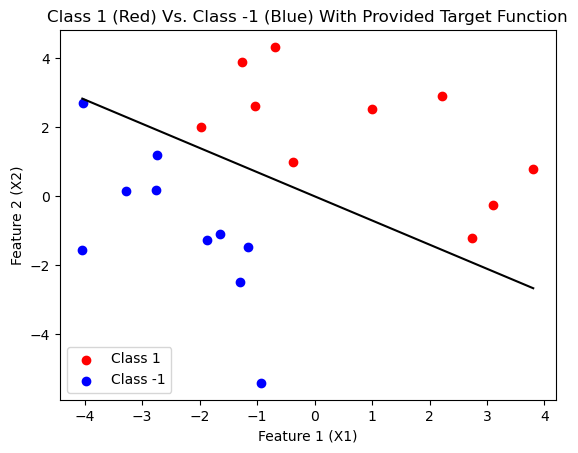

In [5]:
"""" Plotting Data Block """

# Seperate the data by the assigned class values
Class_1_Data = Twentysample_d2[Twentysample_d2['Class'] == 1]
Class_2_Data = Twentysample_d2[Twentysample_d2['Class'] == -1]

# Plot the data using the feature values. Color red for class 1 and blue for class 2
plt.scatter(Class_1_Data['X1'], Class_1_Data['X2'], c = 'Red')
plt.scatter(Class_2_Data['X1'], Class_2_Data['X2'], c = 'Blue')

# Labels for the plot
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.legend(['Class 1', 'Class -1'], loc = 'lower left')

# True target function with b = 0
w = [0, 0.1860, 0.2654]

# Find the x range of the dataset to plot the target function across
x1_min = min(Twentysample_d2['X1'])
x1_max = max(Twentysample_d2['X1'])

# Create equal spaced points across the x domain
x1 = np.linspace(x1_min, x1_max, 20)

# Find the y values for each x value created by the linsapce. Essentially create the slope
# of the target functon based on the final weight values.
x2 = -(w[1] / w[2]) * x1 - (w[0] / w[2])

# Plot the target function in black
plt.plot(x1,x2, color = 'black')

# Plot Title
plt.title('Class 1 (Red) Vs. Class -1 (Blue) With Provided Target Function')

# Show the plot
plt.show()

Problem 1b: Code and run the perceptron learning algorithm on 20sample d2.csv. Report the number of updates that the algorithm takes before converging. Comment on whether the target function f is close to g.

Comments:

The perceptron algorithm that I created can be found below. According to my perceptron, it took 2 convergence steps to find weight values that actually converge. I verified this convergence by plotting the newly found target function across the dataset and verified that it causes the data to be linearly seperable. When comparing my target function to the provided target function, my function has a similar slope but is slightly greater on the Feature 2 (X2) axis.

In [6]:
"""" Perceptron Learning Algorithm Code """

# Create two lists to store the amount of weights required for the data set. I crated an extra list called
# New_Weight_List to make it easier when updating the weight value later in the algorithm
Weight_List, New_Weight_List = np.zeros(3), np.zeros(3)

# Find the length of the data and create a list to store all the predicted values for every data point
Sample_Data_Length = len(Twentysample_d2)
Y_Output_Prediction = np.zeros(Sample_Data_Length)

# Learning/Tuning constant. Set to 0.1 since the data set is small so having a small tuning value won't be
# harmful for runtime
Alpha = 0.1

# Convergence variable to track how many times the algorithm needs to adjust the weights due to misclassifying
# the next data point in the set
Convergence = 0

# Loop for the length of the data set
for i in range(Sample_Data_Length):

    # Initialize the feature list. Index 0 = 1, Index 1 = Featuer #1, Index 2 = Feature #2
    Feature_List = [1, Twentysample_d2['X1'][i], Twentysample_d2['X2'][i]]
    
    # Dot product the weight and feature list.
    Y_Output_Prediction[i] = np.sign(np.dot(Weight_List, Feature_List))  

    # Update weights using equation (w+1) <-- w(t) + Alpha * (yi - y_i_hat) * Xi
    
    # Adjust the weight values by finding the difference of the guess and actual data label
    # and multiply by the difference by the learning rate Alpha
    Constant_Multiplier = Alpha * (Twentysample_d2['Class'][i] - Y_Output_Prediction[i])
    
    # Apply the weight multiplier to each feature in the feature list
    Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
    
    # Add the old weight to the Alpha * (yi - y_i_hat) * Xi calculated above
    for j in range(len(Weight_List)):
        New_Weight_List[j] = Weight_List[j] + Weight_Modifier[j]
    
    # Compare current weight value to new weight value. If the new and old weight values are the same.
    # then the weight does not need to be upadted since the guess is correct
    Weight_Comparison = Weight_List == New_Weight_List
    Identical_Weight_Check = Weight_Comparison.all()

    print(Weight_List, New_Weight_List, Identical_Weight_Check)
    
    # Since the new and old weight are not the same, update the weight values for the next guess.
    # Increment the convergence counter so track the amount of weight updates required for convergence
    # Reset the new weight list.
    
    if not Identical_Weight_Check:
        Weight_List = New_Weight_List
        New_Weight_List = np.zeros(3)
        Convergence += 1
        
print('Number of convergence steps:  ' + str(Convergence))

[0. 0. 0.] [ 0.1     -0.12628  0.38867] False
[ 0.1     -0.12628  0.38867] [0.3      0.6346   0.545324] False
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3      0.6346   0.545324] [0.3      0.6346   0.545324] True
[0.3    

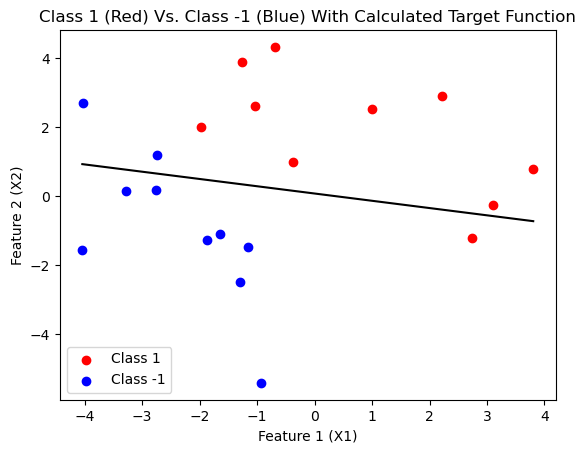

In [83]:
"""" Plotting Data Block """

# Seperate the data by the assigned class values
Class_1_Data = Twentysample_d2[Twentysample_d2['Class'] == 1]
Class_2_Data = Twentysample_d2[Twentysample_d2['Class'] == -1]

# Plot the data using the feature values. Color red for class 1 and blue for class 2
plt.scatter(Class_1_Data['X1'], Class_1_Data['X2'], c = 'Red')
plt.scatter(Class_2_Data['X1'], Class_2_Data['X2'], c = 'Blue')

# Labels for the plot
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.legend(['Class 1', 'Class -1'], loc = 'lower left')

# Find the x range of the dataset to plot the target function across
x1_min = min(Twentysample_d2['X1'])
x1_max = max(Twentysample_d2['X1'])

# Create equal spaced points across the x domain
x1 = np.linspace(x1_min, x1_max, 20)

# Find the y values for each x value created by the linsapce. Essentially create the slope
# of the target functon based on the final weight values.
x2 = -(Weight_List[1] / Weight_List[2]) * x1 - (Weight_List[0] / Weight_List[2])

# Plot the target function in black
plt.plot(x1,x2, color = 'black')

# Plot Title
plt.title('Class 1 (Red) Vs. Class -1 (Blue) With Calculated Target Function')

# Show the plot
plt.show()

Problem 1c: Repeat everything in (b) with another randomly generated generated data set of size N = 20, 2 20sample d2.csv. Compare your results with (b). The true target function is w = [0.1245, 0.9486]T , b = 0

Comments:

When using my perceptron on the new set of data, it was not able to converge. In total, there was 6 convergence steps indicating that the perceptron misclassified 6 data points when coumbing through the entire set. After plotting the calculated target function, its clear that the perceptron did not converge since the target function does not create linearly seperable data. In general though, with the provided data set, it would be difficult to create a simple line that would bisect the data. When comparing the output in 1c to the output in 1b, the perceptron was able to converge given the 1b data set but was unable in the 1c dataset. When comparing the convergence to the provided target function, both target functions do not suceed in creating linearly seperable data.

In [7]:
# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Two_20sample_d2 = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/2_20sample_d2.csv'
Two_20sample_d2 = pd.read_csv(Path_to_Two_20sample_d2, header=None)

# Label the column index
Two_20sample_d2.columns = ['X1', 'X2', 'Class']

print(Two_20sample_d2)

         X1       X2  Class
0   6.29980  1.44220      1
1   0.78085 -4.52140     -1
2  -1.63640 -2.27970     -1
3   0.30129  3.17950      1
4  -2.19870 -0.59425     -1
5  -4.57250  0.77760      1
6   1.04930  1.66480      1
7   0.69858 -3.06430     -1
8   1.96200  0.57034      1
9  -2.53490 -1.30440     -1
10 -2.41530 -4.42250     -1
11 -1.47230  1.17970      1
12 -3.01710 -2.53220     -1
13  8.07410 -1.50850     -1
14  1.11460 -4.01770     -1
15 -1.95940 -1.80890     -1
16  1.27300  1.31860      1
17  3.68860  4.71450      1
18  2.03280 -3.39460     -1
19  2.74990  1.03600      1


In [8]:
"""" Perceptron Learning Algorithm Code """

# Create two lists to store the amount of weights required for the data set. I crated an extra list called
# New_Weight_List to make it easier when updating the weight value later in the algorithm
Weight_List, New_Weight_List = np.zeros(3), np.zeros(3)

# Find the length of the data and create a list to store all the predicted values for every data point
Sample_Data_Length = len(Two_20sample_d2)
Y_Output_Prediction = np.zeros(Sample_Data_Length)

# Learning/Tuning constant. Set to 0.1 since the data set is small so having a small tuning value won't be
# harmful for runtime
Alpha = 0.1

# Convergence variable to track how many times the algorithm needs to adjust the weights due to misclassifying
# the next data point in the set
Convergence = 0

# Loop for the length of the data set
for i in range(Sample_Data_Length):

    # Initialize the feature list. Index 0 = 1, Index 1 = Featuer #1, Index 2 = Feature #2
    Feature_List = [1, Two_20sample_d2['X1'][i], Two_20sample_d2['X2'][i]]
    
    # Dot product the weight and feature list.
    Y_Output_Prediction[i] = np.sign(np.dot(Weight_List, Feature_List))  

    # Update weights using equation (w+1) <-- w(t) + Alpha * (yi - y_i_hat) * Xi
    
    # Adjust the weight values by finding the difference of the guess and actual data label
    # and multiply by the difference by the learning rate Alpha
    Constant_Multiplier = Alpha * (Two_20sample_d2['Class'][i] - Y_Output_Prediction[i])
    
    # Apply the weight multiplier to each feature in the feature list
    Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
    
    # Add the old weight to the Alpha * (yi - y_i_hat) * Xi calculated above
    for j in range(len(Weight_List)):
        New_Weight_List[j] = Weight_List[j] + Weight_Modifier[j]
    
    # Compare current weight value to new weight value. If the new and old weight values are the same.
    # then the weight does not need to be upadted since the guess is correct
    Weight_Comparison = Weight_List == New_Weight_List
    Identical_Weight_Check = Weight_Comparison.all()

    print(Weight_List, New_Weight_List, Identical_Weight_Check)
    
    # Since the new and old weight are not the same, update the weight values for the next guess.
    # Increment the convergence counter so track the amount of weight updates required for convergence
    # Reset the new weight list.
    
    if not Identical_Weight_Check:
        Weight_List = New_Weight_List
        New_Weight_List = np.zeros(3)
        Convergence += 1
        
print('Number of convergence steps:  ' + str(Convergence))

[0. 0. 0.] [0.1     0.62998 0.14422] False
[0.1     0.62998 0.14422] [0.1     0.62998 0.14422] True
[0.1     0.62998 0.14422] [0.1     0.62998 0.14422] True
[0.1     0.62998 0.14422] [0.1     0.62998 0.14422] True
[0.1     0.62998 0.14422] [0.1     0.62998 0.14422] True
[0.1     0.62998 0.14422] [ 0.3     -0.28452  0.29974] False
[ 0.3     -0.28452  0.29974] [ 0.3     -0.28452  0.29974] True
[ 0.3     -0.28452  0.29974] [ 0.3     -0.28452  0.29974] True
[ 0.3     -0.28452  0.29974] [0.5      0.10788  0.413808] False
[0.5      0.10788  0.413808] [0.5      0.10788  0.413808] True
[0.5      0.10788  0.413808] [0.5      0.10788  0.413808] True
[0.5      0.10788  0.413808] [0.5      0.10788  0.413808] True
[0.5      0.10788  0.413808] [0.5      0.10788  0.413808] True
[0.5      0.10788  0.413808] [ 0.3      -1.50694   0.715508] False
[ 0.3      -1.50694   0.715508] [ 0.3      -1.50694   0.715508] True
[ 0.3      -1.50694   0.715508] [ 0.1      -1.11506   1.077288] False
[ 0.1      -1.11506 

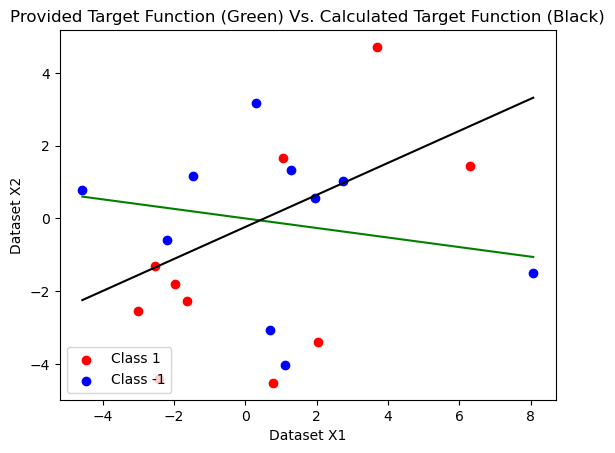

In [87]:
"""" Plotting Data Block """

# Seperate the data by the assigned class values
Class_1_Data = Two_20sample_d2[Twentysample_d2['Class'] == 1]
Class_2_Data = Two_20sample_d2[Twentysample_d2['Class'] == -1]

# Plot the data using the feature values. Color red for class 1 and blue for class 2
plt.scatter(Class_1_Data['X1'], Class_1_Data['X2'], c = 'Red')
plt.scatter(Class_2_Data['X1'], Class_2_Data['X2'], c = 'Blue')

# Labels for the plot
plt.xlabel('Dataset X1')
plt.ylabel('Dataset X2')
plt.legend(['Class 1', 'Class -1'], loc = 'lower left')

# Find the x range of the dataset to plot the target function across
x1_min = min(Two_20sample_d2['X1'])
x1_max = max(Two_20sample_d2['X1'])

# Create equal spaced points across the x domain
x1 = np.linspace(x1_min, x1_max, 20)

# Find the y values for each x value created by the linsapce. Essentially create the slope
# of the target functon based on the final weight values.
x2_true_target = -(0.1245/0.9486) * x1 - (0/0.9486)
x2_calculated = -(Weight_List[1] / Weight_List[2]) * x1 - (Weight_List[0] / Weight_List[2])

# Plot the target functions. GREEN = PROVIDED TF. BLACK = CALCULATED TF.
# I DONT KNOW WHY THE LEGEND WON'T LET ME DISTINGUISH THE TWO
plt.plot(x1,x2_true_target, color = 'green', label= 'Provided Target Function')
plt.plot(x1,x2_calculated, color = 'black', label= 'Calculated Target Function')

# Plot Title
plt.title('Provided Target Function (Green) Vs. Calculated Target Function (Black)')

# Show the plot
plt.show()

Problem 1d: Repeat everything in (b) with another randomly generated data set of size N = 1000, 1000sampe d2.csv. Compare your results with (b). The true target function is w = [−0.9469, −0.1828]T , b = 0

Comments:

When comparing the results to problem 1b, both target functions were able to sucessfully converge but problem 1d took 29 conversion steps while problem 1b took only 2. The cause of the massive increase in convergence steps is due to the increase in the data set. When comparing the provided target function to the calculated target function, both functions are extremely similar with the calculated target function being slightly greater on the X axis and having a slightly steeper slope.

In [10]:
# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Thousandsample_d2 = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset//1000sample_d2.csv'
Thousandsample_d2 = pd.read_csv(Path_to_Thousandsample_d2, header=None)

# Label the column index
Thousandsample_d2.columns = ['X1', 'X2', 'Class']

print(Thousandsample_d2)

           X1        X2  Class
0    -13.6730  -44.8760      1
1    119.2200   15.3000     -1
2    110.1400 -151.4500     -1
3    -27.6750 -107.7200      1
4     26.1700  104.8400     -1
..        ...       ...    ...
995  -46.1090  135.5500      1
996  -44.1900   90.8040      1
997   23.8810  -34.0220     -1
998   -7.9622   25.3620      1
999 -181.1600    6.6779      1

[1000 rows x 3 columns]


In [11]:
"""" Perceptron Learning Algorithm Code """

# Create two lists to store the amount of weights required for the data set. I crated an extra list called
# New_Weight_List to make it easier when updating the weight value later in the algorithm
Weight_List, New_Weight_List = np.zeros(3), np.zeros(3)

# Find the length of the data and create a list to store all the predicted values for every data point
Sample_Data_Length = len(Thousandsample_d2) # N = 1000
Y_Output_Prediction = np.zeros(Sample_Data_Length)

# Learning/Tuning constant. Set to 0.1 since the data set is small so having a small tuning value won't be
# harmful for runtime
Alpha = 0.1

# Convergence variable to track how many times the algorithm needs to adjust the weights due to misclassifying
# the next data point in the set
Convergence = 0

# Loop for the length of the data set
for i in range(Sample_Data_Length):

    # Initialize the feature list. Index 0 = 1, Index 1 = Featuer #1, Index 2 = Feature #2
    Feature_List = [1, Thousandsample_d2['X1'][i], Thousandsample_d2['X2'][i]]
    
    # Dot product the weight and feature list.
    Y_Output_Prediction[i] = np.sign(np.dot(Weight_List, Feature_List))  

    # Update weights using equation (w+1) <-- w(t) + Alpha * (yi - y_i_hat) * Xi
    
    # Adjust the weight values by finding the difference of the guess and actual data label
    # and multiply by the difference by the learning rate Alpha
    Constant_Multiplier = Alpha * (Thousandsample_d2['Class'][i] - Y_Output_Prediction[i])
    
    # Apply the weight multiplier to each feature in the feature list
    Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
    
    # Add the old weight to the Alpha * (yi - y_i_hat) * Xi calculated above
    for j in range(len(Weight_List)):
        New_Weight_List[j] = Weight_List[j] + Weight_Modifier[j]
    
    # Compare current weight value to new weight value. If the new and old weight values are the same.
    # then the weight does not need to be upadted since the guess is correct
    Weight_Comparison = Weight_List == New_Weight_List
    Identical_Weight_Check = Weight_Comparison.all()

    #print(Weight_List, New_Weight_List, Identical_Weight_Check)
    
    # Since the new and old weight are not the same, update the weight values for the next guess.
    # Increment the convergence counter so track the amount of weight updates required for convergence
    # Reset the new weight list.
    
    if not Identical_Weight_Check:
        Weight_List = New_Weight_List
        New_Weight_List = np.zeros(3)
        Convergence += 1
        
print('Number of convergence steps:  ' + str(Convergence))

Number of convergence steps:  29


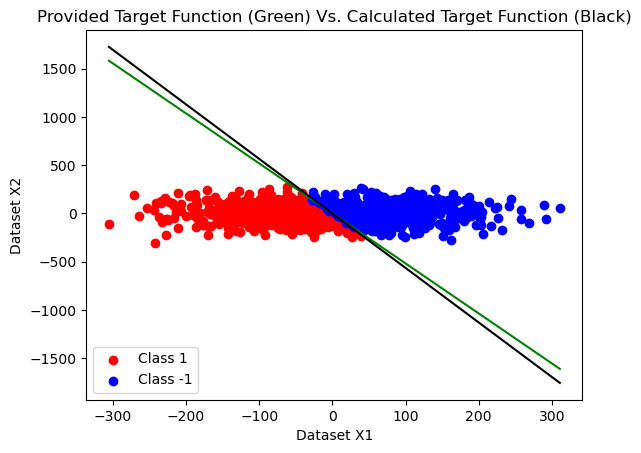

In [92]:
"""" Plotting Data Block """

# Seperate the data by the assigned class values
Class_1_Data = Thousandsample_d2[Thousandsample_d2['Class'] == 1]
Class_2_Data = Thousandsample_d2[Thousandsample_d2['Class'] == -1]

# Plot the data using the feature values. Color red for class 1 and blue for class 2
plt.scatter(Class_1_Data['X1'], Class_1_Data['X2'], c = 'Red')
plt.scatter(Class_2_Data['X1'], Class_2_Data['X2'], c = 'Blue')

# Labels for the plot
plt.xlabel('Dataset X1')
plt.ylabel('Dataset X2')
plt.legend(['Class 1', 'Class -1'], loc = 'lower left')

# Find the x range of the dataset to plot the target function across
x1_min = min(Thousandsample_d2['X1'])
x1_max = max(Thousandsample_d2['X1'])

# Create equal spaced points across the x domain
x1 = np.linspace(x1_min, x1_max, 20)

# Find the y values for each x value created by the linsapce. Essentially create the slope
# of the target functon based on the final weight values.
x2_true_target = -(-0.9469/-0.1828) * x1 - (0/-0.1828)
x2_calculated = -(Weight_List[1] / Weight_List[2]) * x1 - (Weight_List[0] / Weight_List[2])

# Plot the target functions. GREEN = PROVIDED TF. BLACK = CALCULATED TF.
# I DONT KNOW WHY THE LEGEND WON'T LET ME DISTINGUISH THE TWO
plt.plot(x1,x2_true_target, color = 'green', label= 'Provided Target Function')
plt.plot(x1,x2_calculated, color = 'black', label= 'Calculated Target Function')

# Plot Title
plt.title('Provided Target Function (Green) Vs. Calculated Target Function (Black)')

# Show the plot
plt.show()

Problem 1e: We now use a dataset where the input space is X = R10 (d = 10), 1000sample d10.csv. Now the points can no longer be visualized. Run the perceptron learning algorithm on where N = 1000. How many updates does the algorithm take to converge?

Comments:

After loading the new dataset with 10 dimensions, the perception algorithm found 44 convergence steps. This means that the algorithm misidentified 44 data points for their class values. As the data is not plottable, we are unable to visually verify if the target function converges or not.

In [13]:
# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Thousandsample_d10 = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/1000sample_d10.csv'
Thousandsample_d10 = pd.read_csv(Path_to_Thousandsample_d10, header=None)

# Label the column index
Feature_Index = list(range(0, Thousandsample_d10.shape[1]))
Thousandsample_d10.columns = Feature_Index

# Print the data set
#print(Thousandsample_d10)

In [14]:
# Find the length of the data set
Column_Length_Of_Dataset = Thousandsample_d10.shape[1]
Sample_Data_Length = len(Thousandsample_d10)

# Create the Weight list and new weight list similar to the perceptron algorithm above
Weight_List, New_Weight_List = np.zeros(Column_Length_Of_Dataset), np.zeros(Column_Length_Of_Dataset)

# Create list to store prediction of each data point
Y_Output_Prediction = np.zeros(Sample_Data_Length)

# Training/Alpha Value
Alpha = 0.1

# Convergence step counter
Convergence = 0

# Create feature list of all 1's. Defaulted the list to 1's since the first element must be 1 and the
# remaining elements will be overwritten later in the algorithm
Feature_List = np.ones(Column_Length_Of_Dataset)

In [81]:
# Loop over the entire data set
for i in range(Sample_Data_Length):

    # Set the values for the feature list. I used a loop since the index names for each column
    # are number values so used loop to call each columns values.
    for j in range(len(Feature_List)):
        if j > 0:
            Feature_List[j] = Thousandsample_d10[j][i]
    
    # Find and store the prediction value using the sign function on the weight and feature list
    Y_Output_Prediction[i] = np.sign(np.dot(Weight_List, Feature_List))  

    # Update weights using equation (w+1) <-- w(t) + Alpha * (yi - y_i_hat) * Xi
    
    # Adjust the weight values by finding the difference of the guess and actual data label
    # and multiply by the difference by the learning rate Alpha
    Constant_Multiplier = Alpha * (Thousandsample_d10[j][i] - Y_Output_Prediction[i])
    
    # Apply the weight multiplier to each feature in the feature list
    Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
    
    # Add the old weight to the Alpha * (yi - y_i_hat) * Xi calculated above
    for k in range(len(Weight_List)):
        New_Weight_List[k] = Weight_List[k] + Weight_Modifier[k]
    
    # Compare the old weight to the new weight to see if the function is converging
    Weight_Comparison = Weight_List == New_Weight_List
    Identical_Weight_Check = Weight_Comparison.all()

    #print(Weight_List, New_Weight_List, Identical_Weight_Check)
    
    # Since the new and old weight are not the same, update the weight values for the next guess.
    # Increment the convergence counter so track the amount of weight updates required for convergence
    # Reset the new weight list.
    
    if not Identical_Weight_Check:
        Weight_List = New_Weight_List
        New_Weight_List = np.zeros(Column_Length_Of_Dataset)
        Convergence += 1
        
print('Convergence found in ' + str(Convergence) + ' steps')

Convergence found in 44 steps


Problem 1f: Repeat the algorithm on the same data set as (e) for 100 experiments. For each experiments, randomly select your misclassified points. Plot a histogram for the number of updates that the algorithm takes to converge

Comments:

After performing the perception algorithm for 100 experients and randomly selecting the misclassified points, the amount of convergence steps required to converge are concentrated between 22 and 34 steps. 

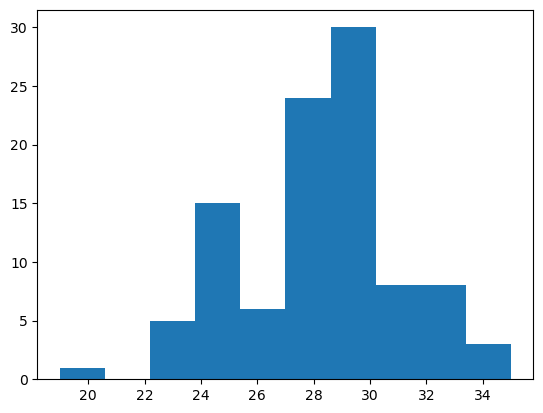

In [15]:
# Require the random libary 
import random

# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Thousandsample_d10 = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/1000sample_d10.csv'
Thousandsample_d10 = pd.read_csv(Path_to_Thousandsample_d10, header=None)

# Label the column index
Feature_Index = list(range(0, Thousandsample_d10.shape[1]))
Thousandsample_d10.columns = Feature_Index

# Print the data set
#print(Thousandsample_d2)

# Find the length of the data set
Column_Length_Of_Dataset = Thousandsample_d10.shape[1]
Sample_Data_Length = len(Thousandsample_d10)

# Learning value
Alpha = 0.1

# List to store the amount of convergence steps across the 100 experiments
Convergence_List = []

# Loop for the 100 experiments
for idx in range(100):
    
    # Set the convergence value for this current experiment to 0
    Convergence = 0
    
    # Initialize the weight and new weight list
    Weight_List, New_Weight_List = np.zeros(Column_Length_Of_Dataset), np.zeros(Column_Length_Of_Dataset)
    
    # Initialize the output prediction list
    Y_Output_Prediction = np.zeros(Sample_Data_Length)
    
    # Initialize the feature list
    Feature_List = np.ones(Column_Length_Of_Dataset)
    
    # Loop across the entire data set
    for i in range(Sample_Data_Length):

        # Update all the feature values for the specific data point into the feature list
        for j in range(len(Feature_List)):
            if j > 0:
                Feature_List[j] = Thousandsample_d10[j][i]
        
        # Calculate the output prediction
        Y_Output_Prediction[i] = np.sign(np.dot(Weight_List, Feature_List))  
    
        # Randomly select whether to update the weights or not.
        if random.randint(0,1) == 0:
            
            # If the random function selects 0, update the weight values.
            Constant_Multiplier = Alpha * (Thousandsample_d10[Column_Length_Of_Dataset - 1][i] - Y_Output_Prediction[i])
            Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
            
            # Update every weight value in the weight list
            for k in range(len(Weight_List)):
                New_Weight_List[k] = Weight_List[k] + Weight_Modifier[k]
            
            # Compare the current and new weight list
            Weight_Comparison = Weight_List == New_Weight_List
            Identical_Weight_Check = Weight_Comparison.all()

            # If the current and new weight list don't equal each other, then increment the convergence
            # counter and reset the new weight list
            if not Identical_Weight_Check:
                Weight_List = New_Weight_List
                New_Weight_List = np.zeros(Column_Length_Of_Dataset)
                Convergence += 1
    
    # Append the amount of convergence steps for each experiment to the convergence list
    Convergence_List.append(Convergence)

# Plot the histogram
plt.hist(Convergence_List)
plt.show()

Problem 1g: Summarize your conclusions with respect to accuracy and running time as a function of N and d.

In order to compare the accuracy and run time of the previous experiment, we must look at N and d. d represents the number of features in the data set while N represents the amount of total data in the set. For example, problem 1e states that d = 10 and N = 1000 which means there are 10 features (and the class type) for each data point and there are 1000 data points.

Run time increases in terms of f(N * d) since the perceptron will have to perform work over d features N amount of time.

In terms of accuracy, as N and d increases, the accuracy of the perceptron may decrease due to the added complexity of trying to create a boundary to ensure complete seperation between the classes of data. Having a larger data set may also cause data points to exist in locations where it may never be possible to draw a defined boundary seperating the data point classes.